Problem Statement : Crop yield prediction and Crop Rotation

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the dataset

df = pd.read_csv("Crop_recommendationV2.csv")

In [7]:
# dataset shape

print("Dataset Shape:", df.shape)

Dataset Shape: (2200, 23)


In [13]:
# dataset statistical summary

print("Stastical summary", df.describe())

Stastical summary                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  soil_moisture    soil_type  \
count  2200.000000  2200.000000    2200.000000  2200.000000   
mean      6.469480   103.463655      20.151388     1.991364   
std       0.773938    54.958389       5.793720     0.812263   
min       3.504752    20.211267      10.024260     1.000000   


Dataset Description:

N (ppm): Nitrogen concentration in the soil.
P (ppm): Phosphorus concentration in the soil.
K (ppm): Potassium concentration in the soil.
Temperature (°C): Ambient temperature at the farm.
Humidity (%): Relative humidity in the environment.
pH: Acidity or alkalinity of the soil.
Rainfall (mm): Total rainfall received.
Soil Moisture (%): Water content present in the soil.
Soil Type: Type of soil classified as:
    1 = Sandy
    2 = Loamy
    3 = Clay
Sunlight Exposure (hrs/day): Daily exposure to sunlight.
Wind Speed (km/h): Speed of wind at the location.
CO₂ Concentration (ppm): Atmospheric carbon dioxide concentration.
Organic Matter (%): Proportion of organic content in the soil.
Irrigation Frequency (times/week): Number of irrigation events per week.
Crop Density (plants/m²): Plant density per unit area.
Pest Pressure (index): Level of pest infestation.
Fertilizer Usage (kg/ha): Quantity of fertilizer applied per hectare.
Growth Stage: Current crop growth stage:
    1 = Seedling
    2 = Vegetative
    3 = Flowering
Urban Area Proximity (km): Distance from the farm to the nearest urban area.
Water Source Type: Source of irrigation water:
    1 = River
    2 = Groundwater
    3 = Recycled
Frost Risk (index): Frost likelihood index.
Water Usage Efficiency (L/kg): Water use per unit crop yield.
Label: Target variable representing the type of crop

In [11]:
# dataset information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [15]:
# datatpes

print("Data Types:", df.dtypes)

Data Types: N                           int64
P                           int64
K                           int64
temperature               float64
humidity                  float64
ph                        float64
rainfall                  float64
label                      object
soil_moisture             float64
soil_type                   int64
sunlight_exposure         float64
wind_speed                float64
co2_concentration         float64
organic_matter            float64
irrigation_frequency        int64
crop_density              float64
pest_pressure             float64
fertilizer_usage          float64
growth_stage                int64
urban_area_proximity      float64
water_source_type           int64
frost_risk                float64
water_usage_efficiency    float64
dtype: object


In [17]:
# column list

print("Columns:", df.columns.tolist())

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed', 'co2_concentration', 'organic_matter', 'irrigation_frequency', 'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage', 'urban_area_proximity', 'water_source_type', 'frost_risk', 'water_usage_efficiency']


In [19]:
# missing values

print("Missing Values:", df.isnull().sum())

Missing Values: N                         0
P                         0
K                         0
temperature               0
humidity                  0
ph                        0
rainfall                  0
label                     0
soil_moisture             0
soil_type                 0
sunlight_exposure         0
wind_speed                0
co2_concentration         0
organic_matter            0
irrigation_frequency      0
crop_density              0
pest_pressure             0
fertilizer_usage          0
growth_stage              0
urban_area_proximity      0
water_source_type         0
frost_risk                0
water_usage_efficiency    0
dtype: int64


In [21]:
# duplicate rows

print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [25]:
# top 5 records

print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064         2  ...        3.121395                     4   
1      12.851183         3  ...        2.142021                     4   
2      29.363913         2  ...        1.474974                     1   
3      26.207732         3  ...        8.393907                     1   
4      28.236236         2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910      57.607308        188.194958             1   
1     16.79710

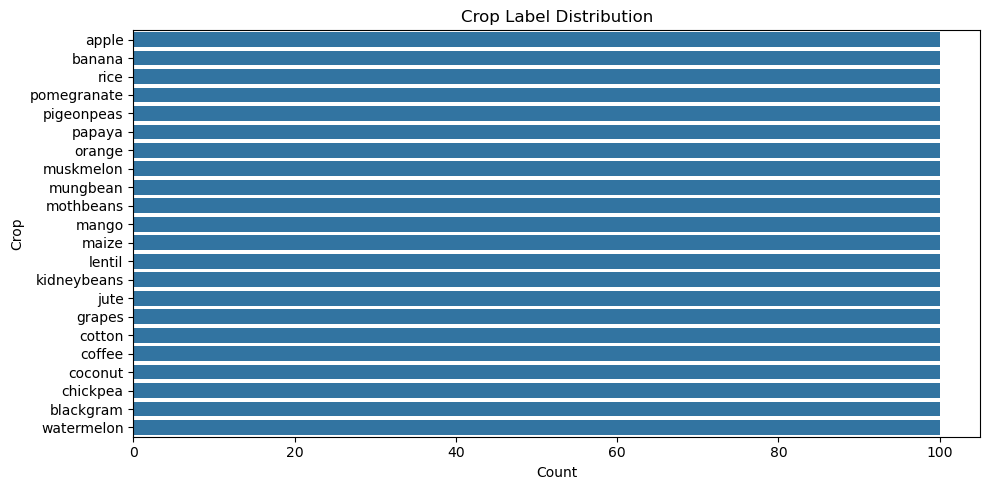

In [27]:
# crop label distribution

plt.figure(figsize=(10, 5))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title("Crop Label Distribution")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

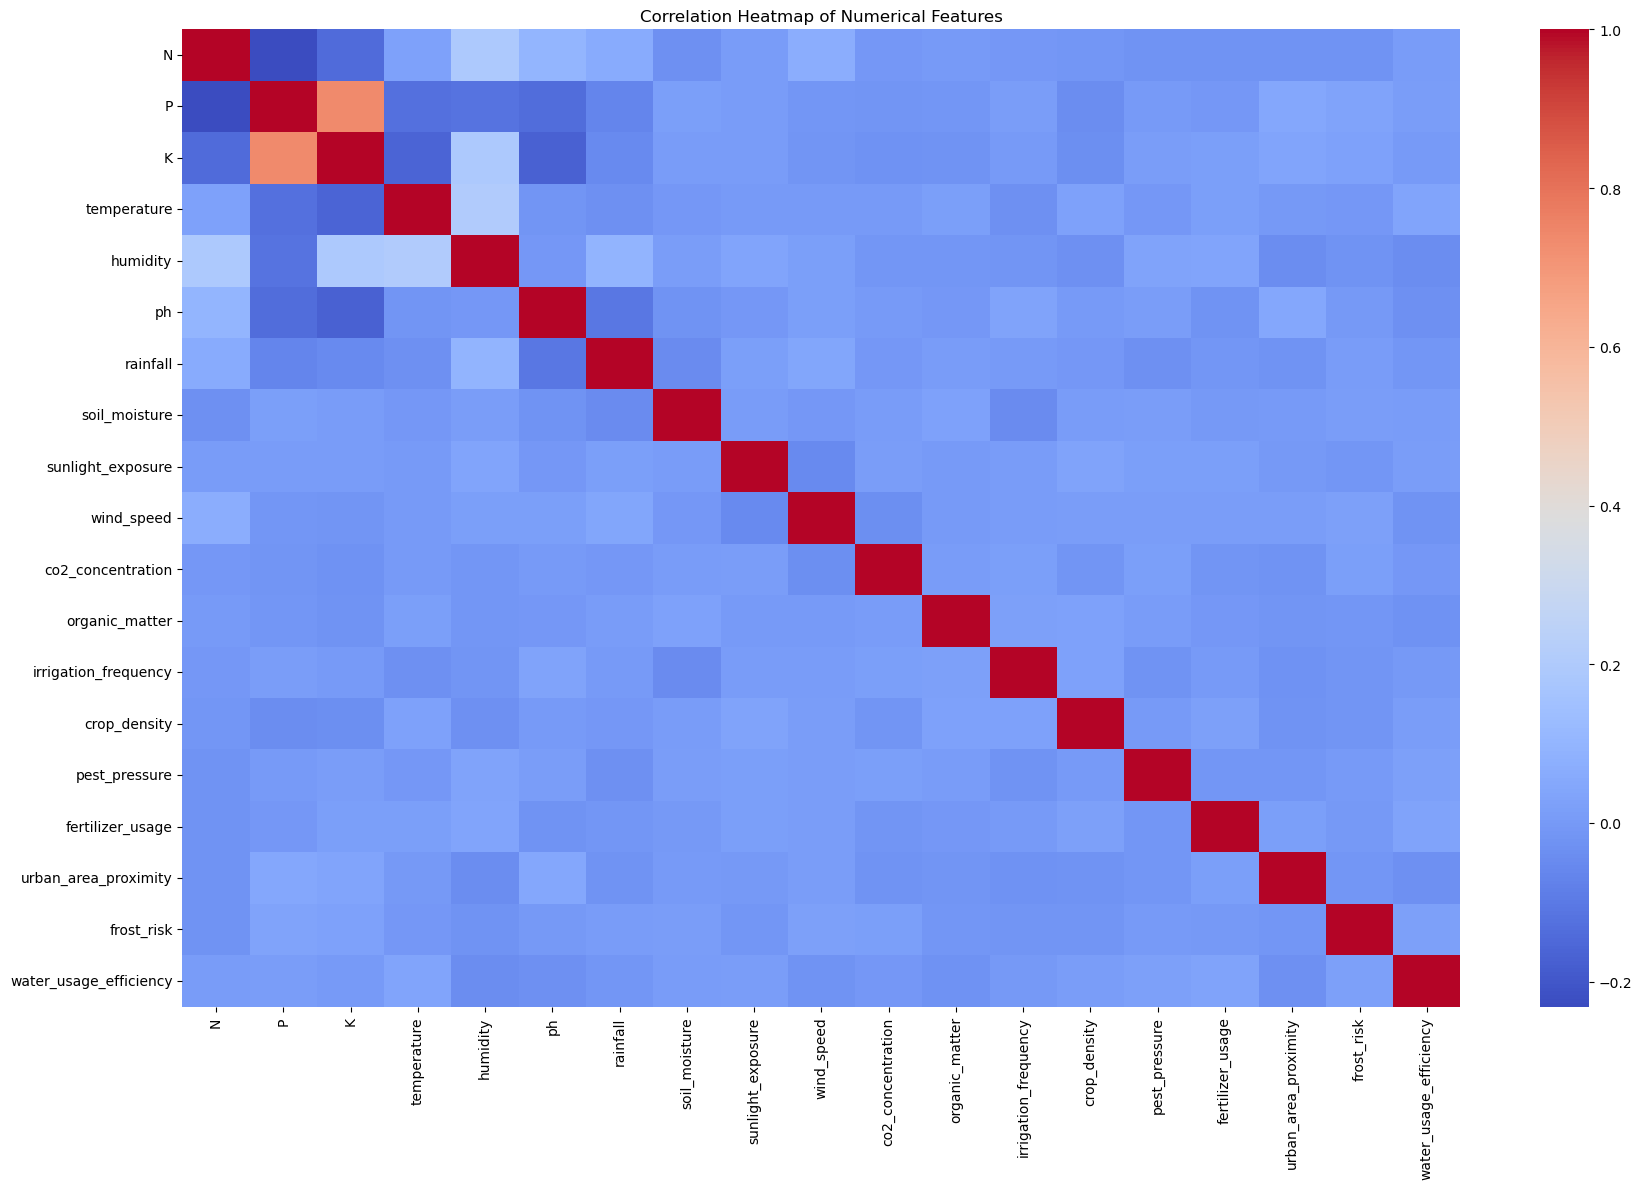

In [29]:
# correlation heatmap between the variables

plt.figure(figsize=(18, 12))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

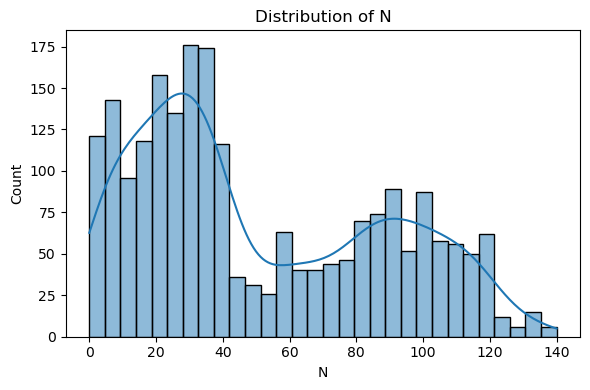

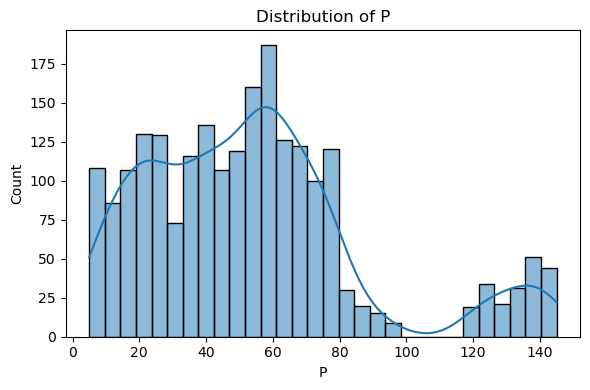

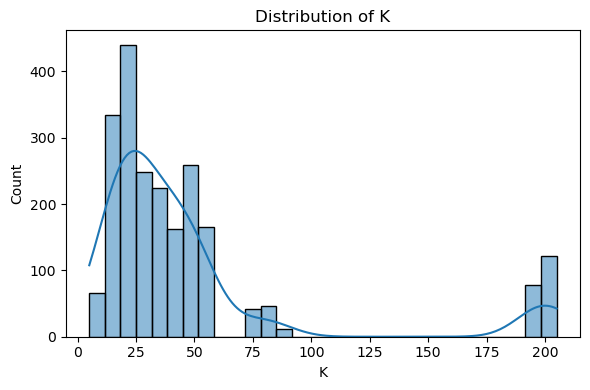

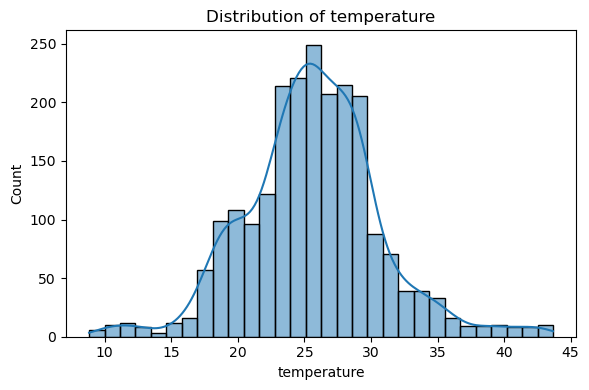

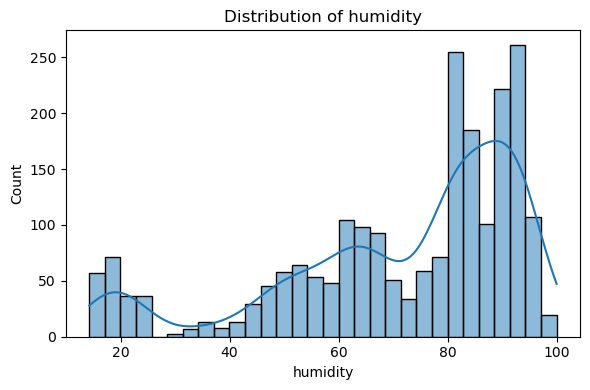

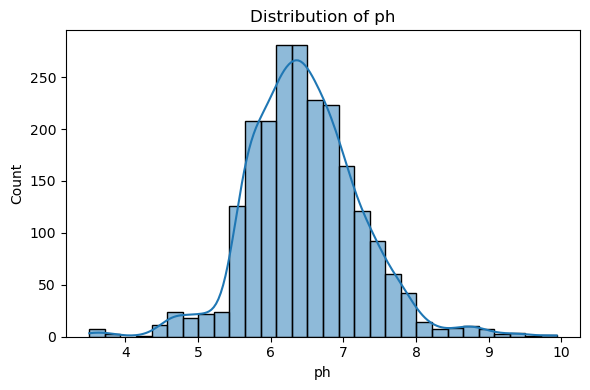

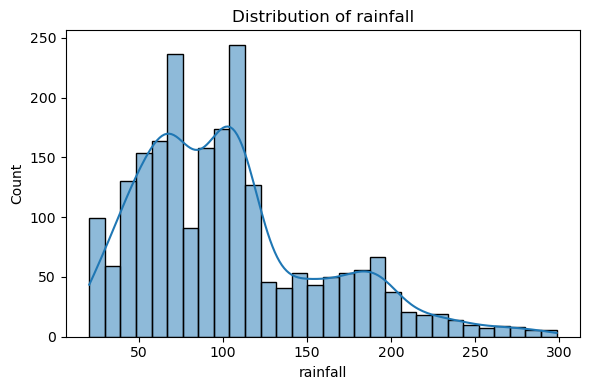

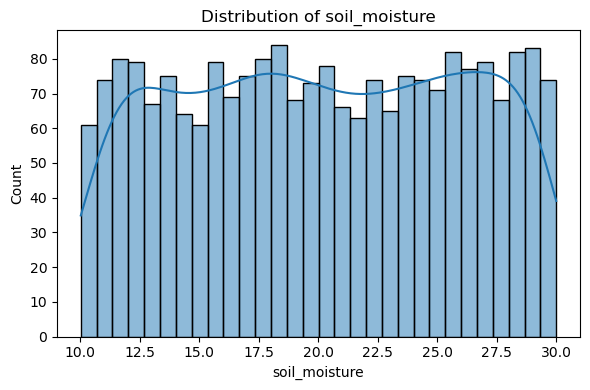

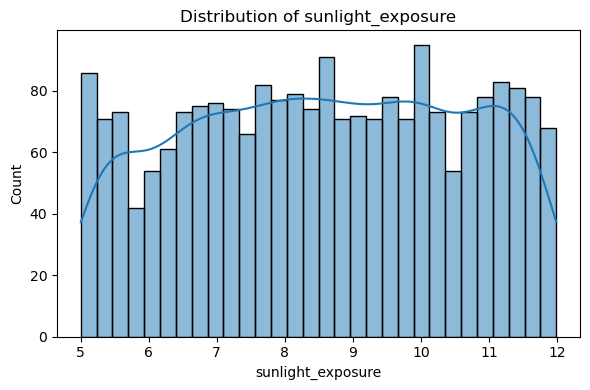

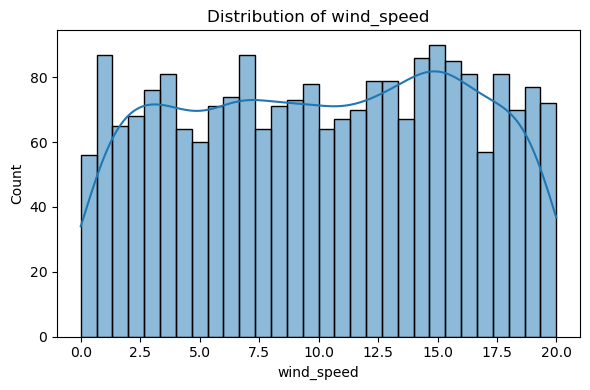

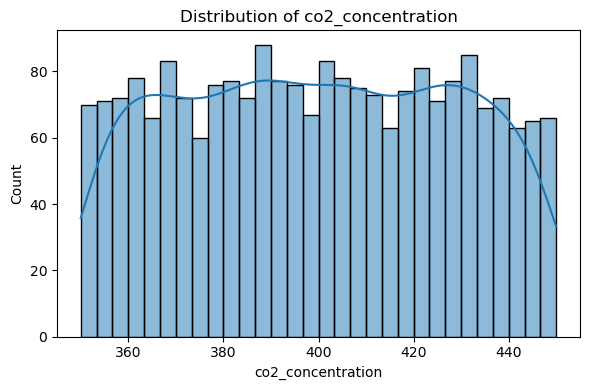

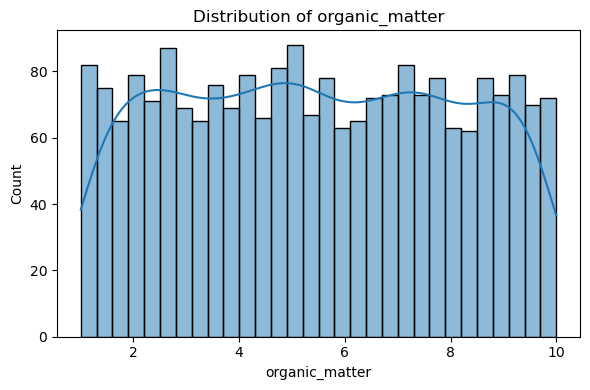

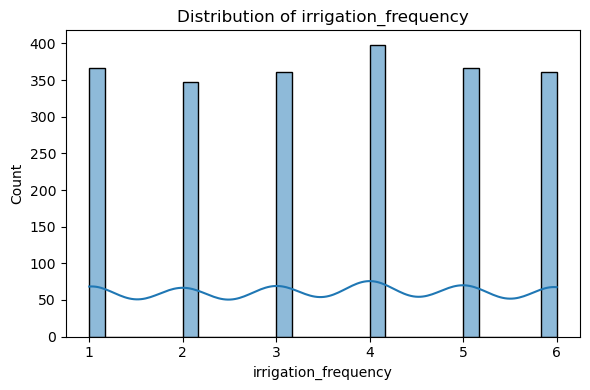

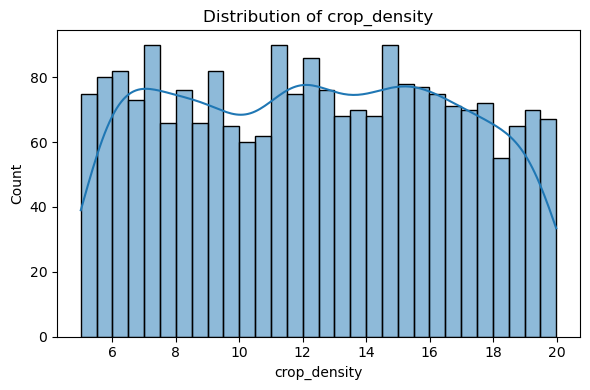

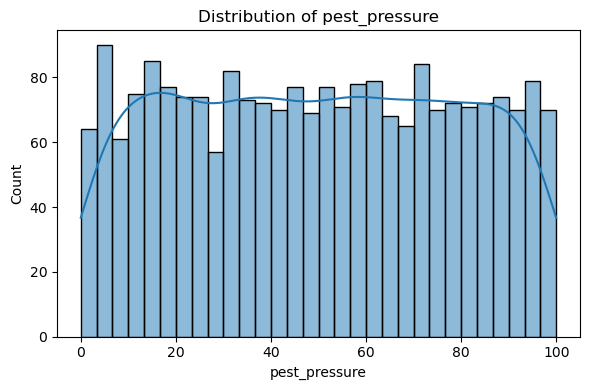

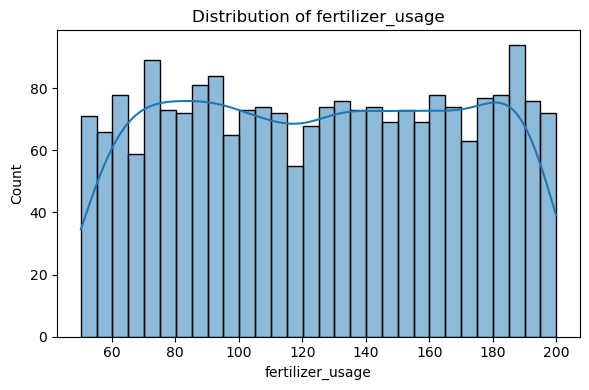

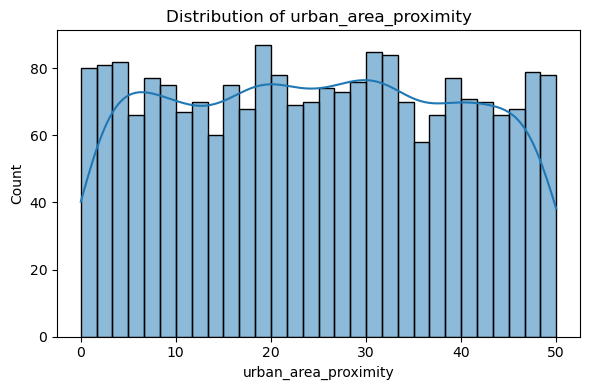

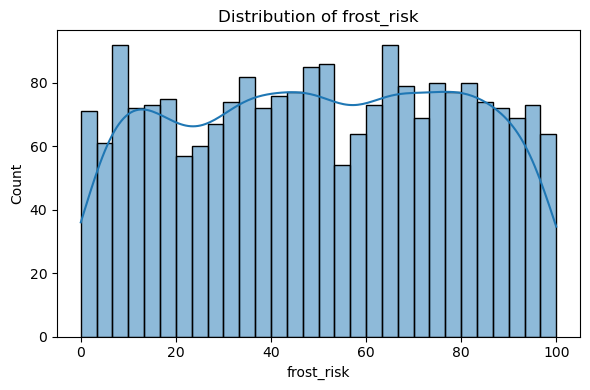

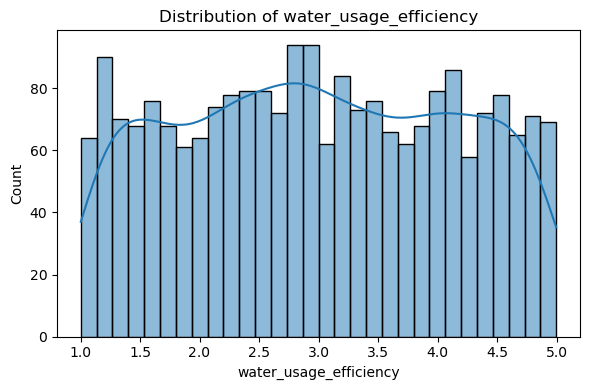

In [31]:
# distribution plot for numerical features

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

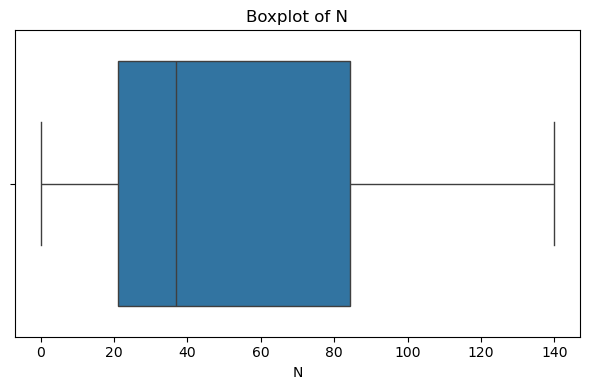

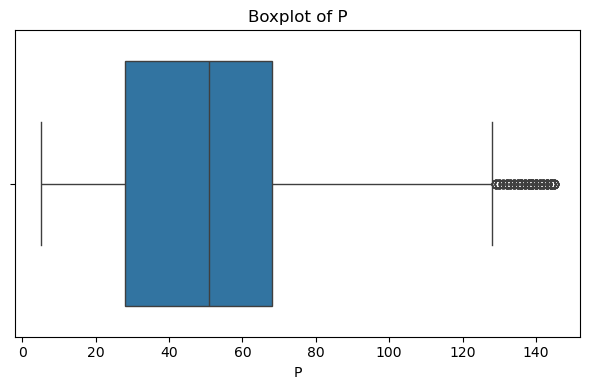

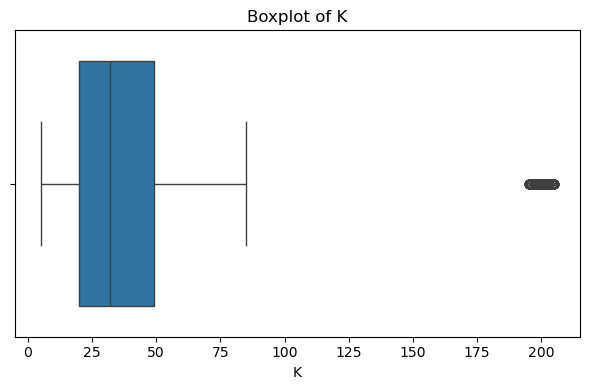

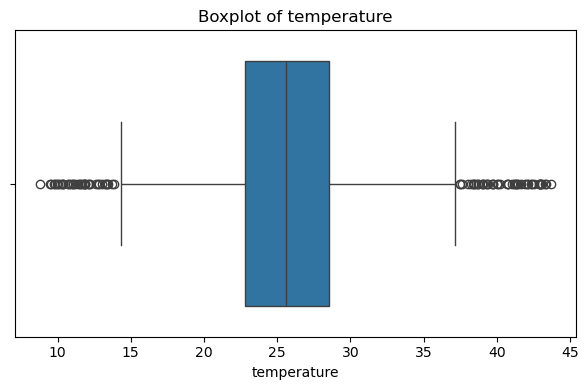

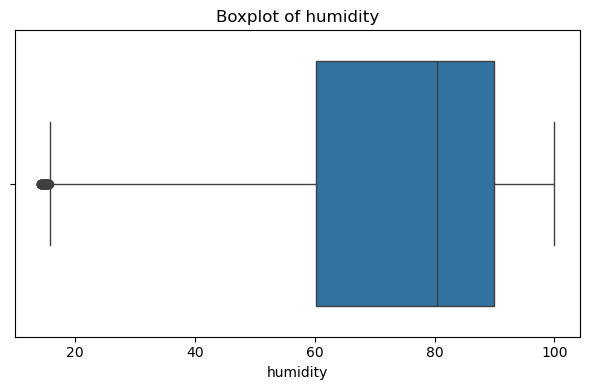

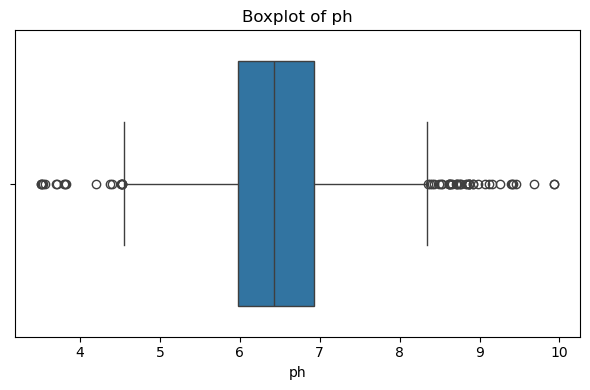

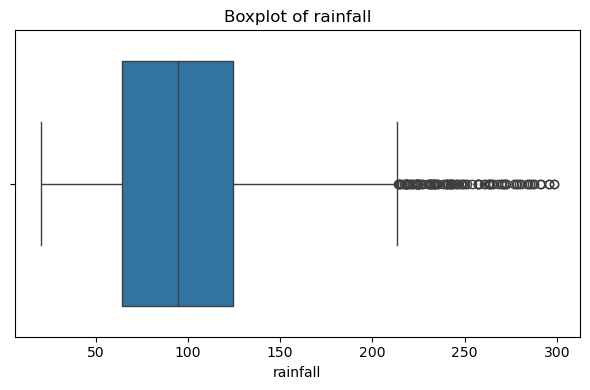

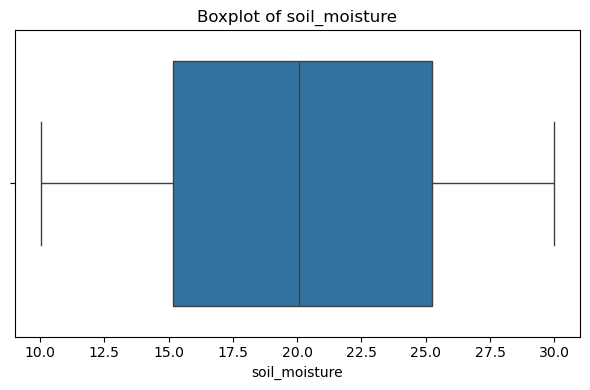

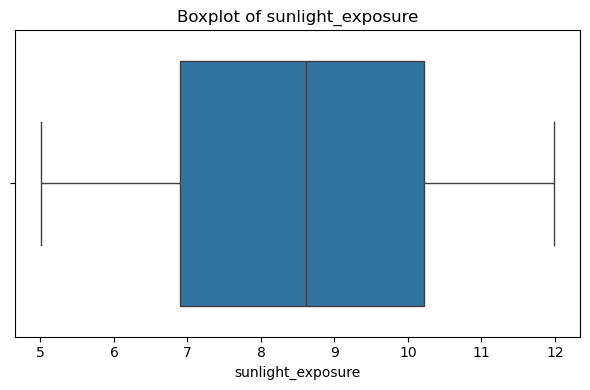

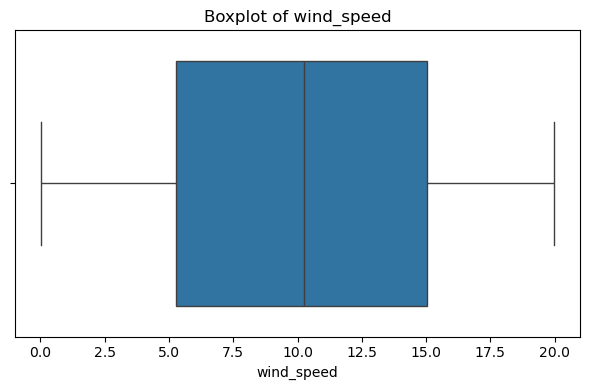

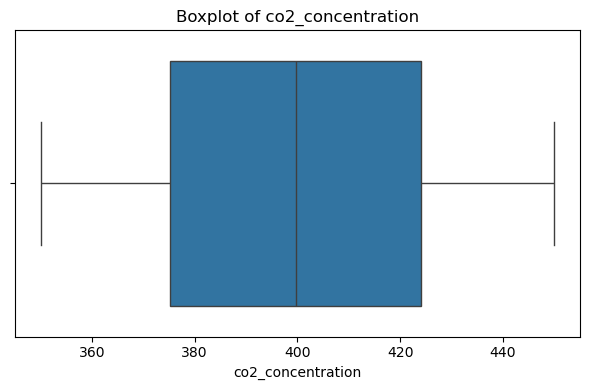

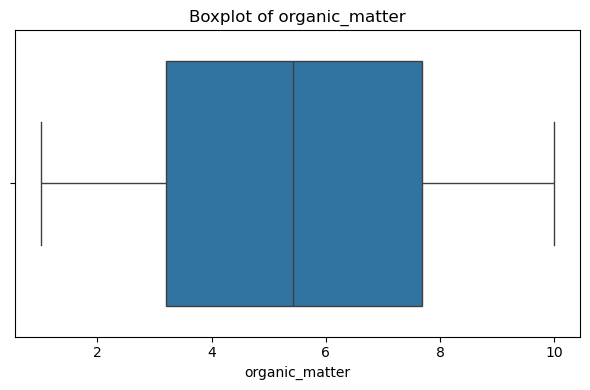

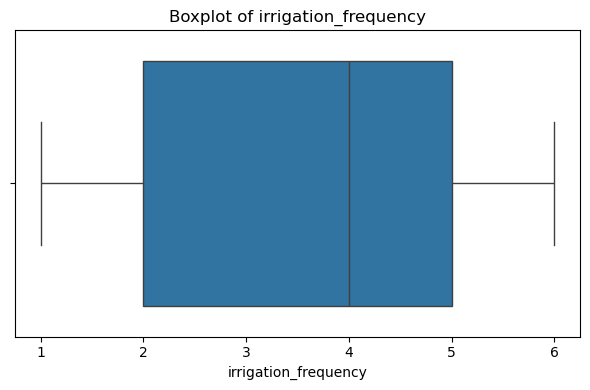

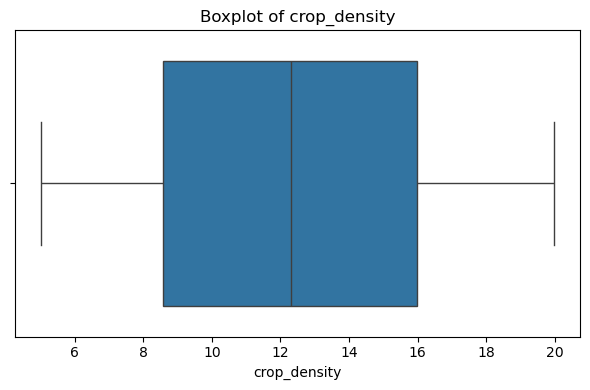

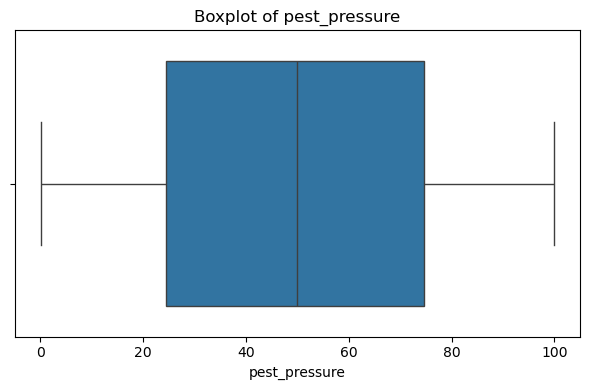

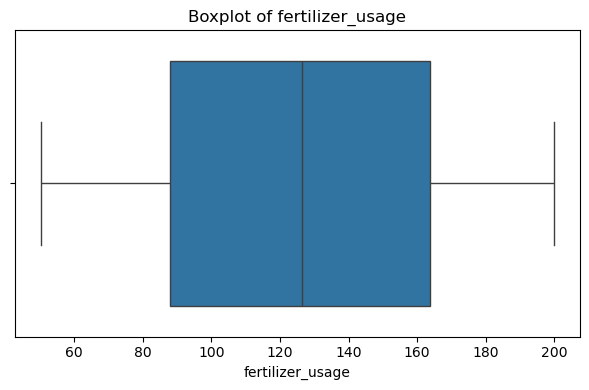

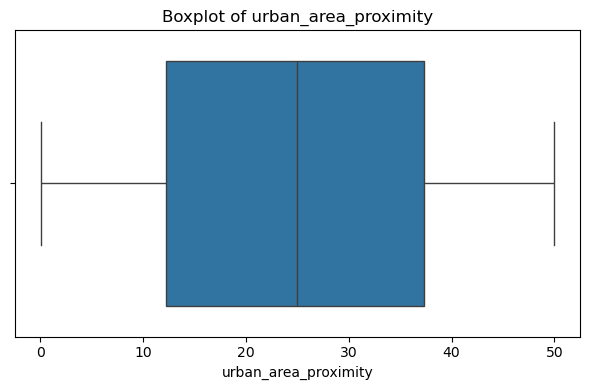

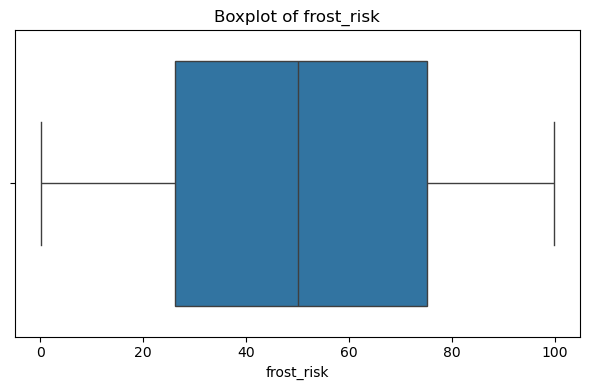

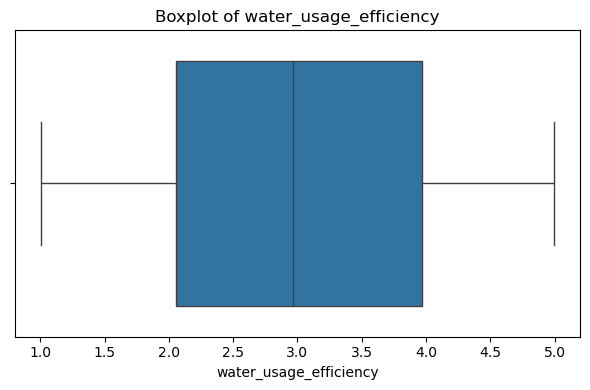

In [35]:
# boxplot for ourlier detection

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [37]:
# N, P, K and Soil moisture of each type of crop

grouped = df.groupby('label')[['N', 'P', 'K', 'soil_moisture']].mean().sort_values(by='N', ascending=False)
print("\nAverage N, P, K, Soil Moisture per Crop:\n", grouped)


Average N, P, K, Soil Moisture per Crop:
                   N       P       K  soil_moisture
label                                             
cotton       117.77   46.24   19.56      20.224024
coffee       101.20   28.74   29.94      19.940561
muskmelon    100.32   17.72   50.08      19.786793
banana       100.23   82.01   50.05      20.428229
watermelon    99.42   17.00   50.22      19.863880
rice          79.89   47.58   39.87      19.175797
jute          78.40   46.86   39.99      18.665502
maize         77.76   48.44   19.79      20.537713
papaya        49.88   59.05   50.04      20.180498
chickpea      40.09   67.79   79.92      20.242123
blackgram     40.02   67.47   19.24      20.875557
grapes        23.18  132.53  200.11      19.620926
coconut       21.98   16.93   30.59      20.110048
mothbeans     21.44   48.01   20.23      19.965190
mungbean      20.99   47.28   19.87      21.189571
apple         20.80  134.22  199.89      21.222483
kidneybeans   20.75   67.54   20.05    

C:\Users\mkjai\AppData\Local\Temp\ipykernel_9816\3876526387.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('label')[['N', 'P', 'K', 'soil_moisture']].mean().sort_values(by='N', ascending=False)


C:\Users\mkjai\AppData\Local\Temp\ipykernel_9816\4270882520.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  npk_avg = df.groupby('label')[['N', 'P', 'K']].mean()


<Figure size 1400x600 with 0 Axes>

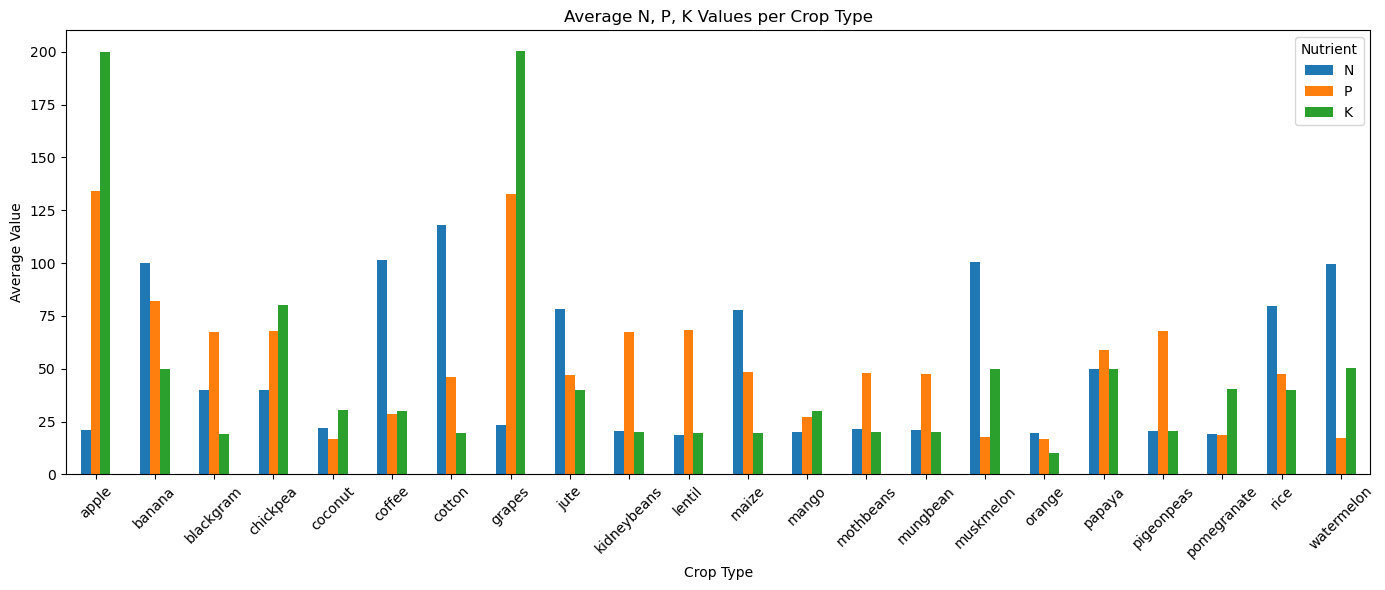

In [39]:
# visualization of average N, P, K values for each crop

npk_avg = df.groupby('label')[['N', 'P', 'K']].mean()

plt.figure(figsize=(14, 6))
npk_avg.plot(kind='bar', figsize=(14, 6))
plt.title("Average N, P, K Values per Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()

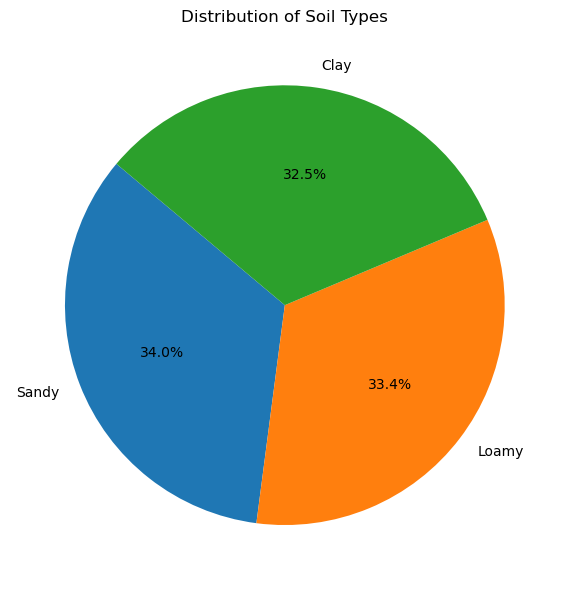

In [41]:
# soil type distribution

soil_counts = df['soil_type'].value_counts()
soil_labels = ['Sandy', 'Loamy', 'Clay']
plt.figure(figsize=(6, 6))
plt.pie(soil_counts, labels=soil_labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Soil Types")
plt.tight_layout()
plt.show()

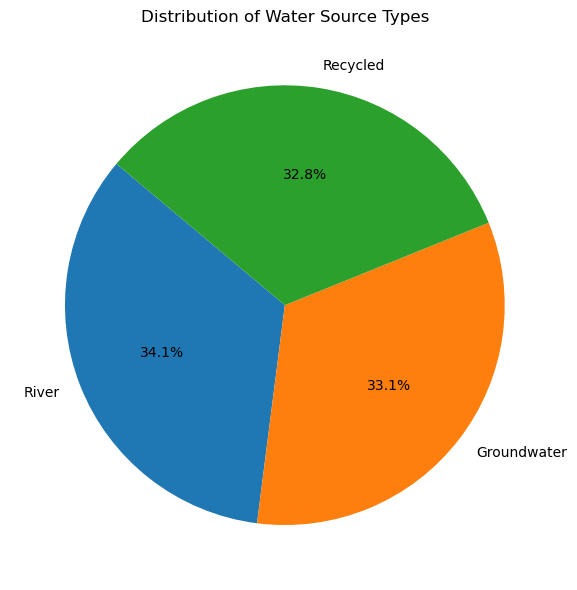

In [43]:
# water source distribution

water_counts = df['water_source_type'].value_counts()
water_labels = ['River', 'Groundwater', 'Recycled']
plt.figure(figsize=(6, 6))
plt.pie(water_counts, labels=water_labels, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Water Source Types")
plt.tight_layout()
plt.show()

C:\Users\mkjai\AppData\Local\Temp\ipykernel_9816\2016208437.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_env = df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()


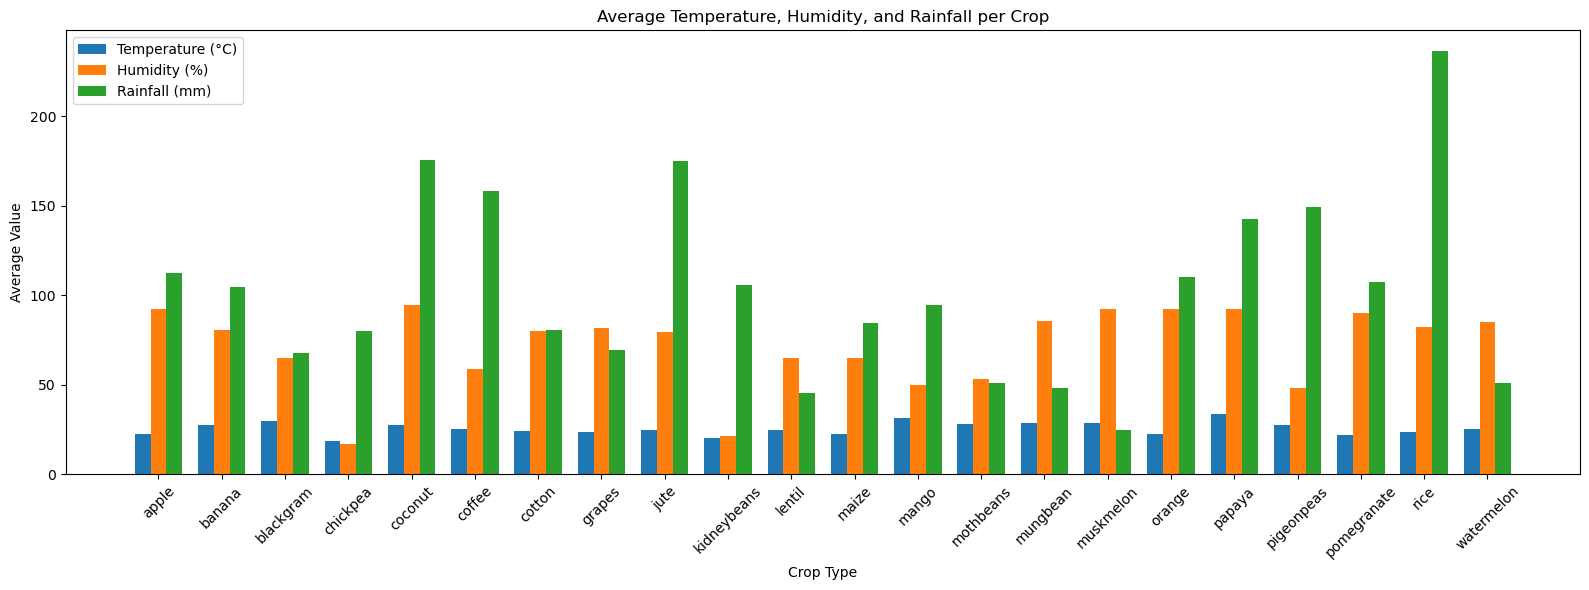

In [50]:
# average temperature, humidity and rainfall for each crop

avg_env = df.groupby('label')[['temperature', 'humidity', 'rainfall']].mean().reset_index()

labels = avg_env['label']
temperature = avg_env['temperature']
humidity = avg_env['humidity']
rainfall = avg_env['rainfall']

x = np.arange(len(labels))  
width = 0.25  

plt.figure(figsize=(16, 6))
plt.bar(x - width, temperature, width, label='Temperature (°C)')
plt.bar(x, humidity, width, label='Humidity (%)')
plt.bar(x + width, rainfall, width, label='Rainfall (mm)')

plt.xlabel('Crop Type')
plt.ylabel('Average Value')
plt.title('Average Temperature, Humidity, and Rainfall per Crop')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\mkjai\AppData\Local\Temp\ipykernel_9816\2714436168.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage = df.groupby('label')[['fertilizer_usage', 'water_usage_efficiency']].mean()


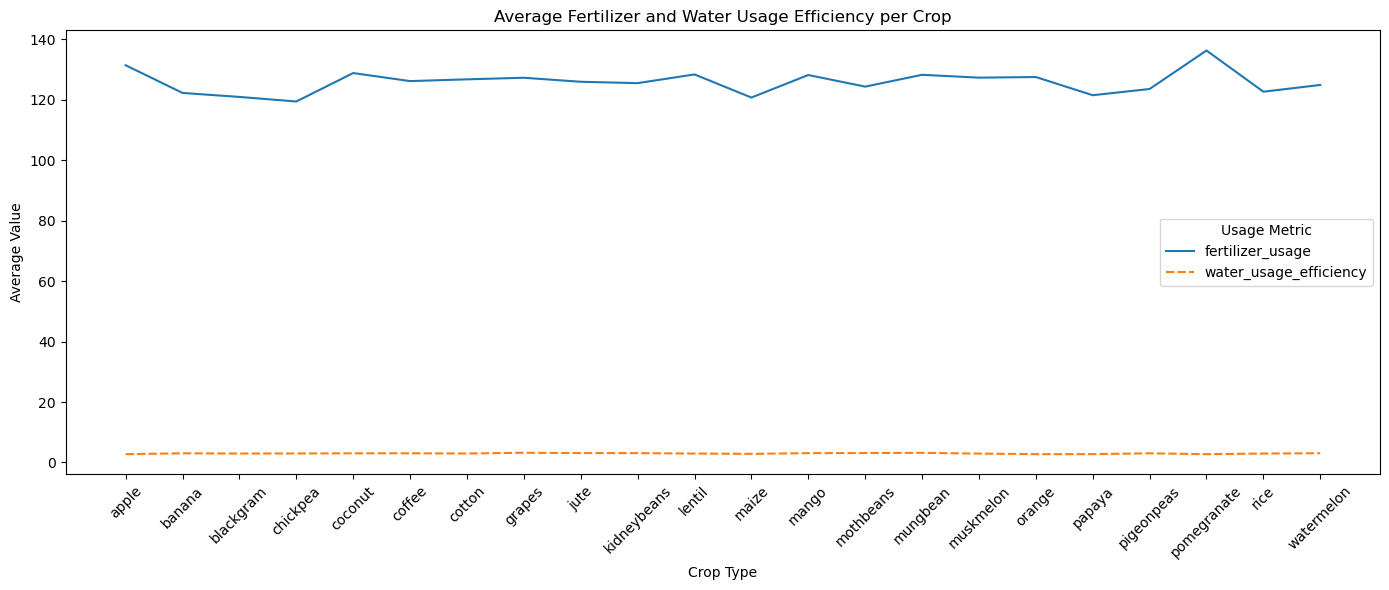

In [52]:
# fertilizer and water usage effeciency for each crop

avg_usage = df.groupby('label')[['fertilizer_usage', 'water_usage_efficiency']].mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_usage)
plt.title("Average Fertilizer and Water Usage Efficiency per Crop")
plt.xlabel("Crop Type")
plt.ylabel("Average Value")
plt.xticks(ticks=range(len(avg_usage.index)), labels=avg_usage.index, rotation=45)
plt.legend(title='Usage Metric')
plt.tight_layout()
plt.show()